## Rozwiązanie TSP

Korzystam z zewnętrznej blibloteki która pozwala definiowac funkcję ruchu, energi, zeminiac parametry ciepła.

In [1]:
import numpy as np
from simanneal import Annealer
import math
import random
import matplotlib.pyplot as plt
import itertools

def create_points(xs, ys, x, y, n):
    points = []
    for i in range(n):
        x1 = random.randint(xs, x)
        y1 = random.randint(ys, y)
        point = [x1, y1]
        while point in points:
            x1 = random.randint(xs, x)
            y1 = random.randint(ys, y)
            point = [x1, y1]
        points.append(point) 
    return points

def plot_tsp(points):
    for i in range(len(a)):
        j = (i + 1)%(len(a))
        x = a[i]
        y = a[j]
        plt.plot([x[0], y[0]],[x[1], y[1]] , marker = 'o')
    plt.show()

class TSP(Annealer):
    Ts=[]
    Es=[]
    def move(self):
        a = random.randint(0, len(self.state) - 1)
        b = (a + 1)%(len(self.state))
        self.state[a], self.state[b] = self.state[b], self.state[a]
        
    def energy(self):
        e = 0
        for i in range(len(self.state)):
            j = (i + 1)%(len(self.state))
            a = self.state[i]
            b = self.state[j]
            e += np.sqrt(math.pow(a[0] - b[0], 2) + math.pow(a[1] - b[1], 2))
        return e
    def update(self, step, T, E, acceptance, improvement):
        self.Ts.append(T)
        self.Es.append(E)
    def getData(self):
        return self.Es, self.Ts        

## Losowe punkty

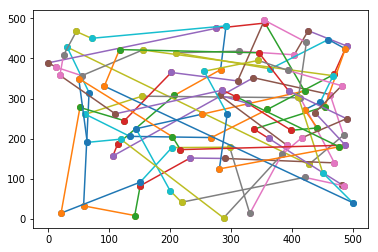

13091.8342046


In [2]:
tsp = TSP(create_points(0,0,500, 500, 100))
tsp.updates = 100000
tsp.steps=100000
a, b = tsp.anneal()
plot_tsp(a)
print(b)


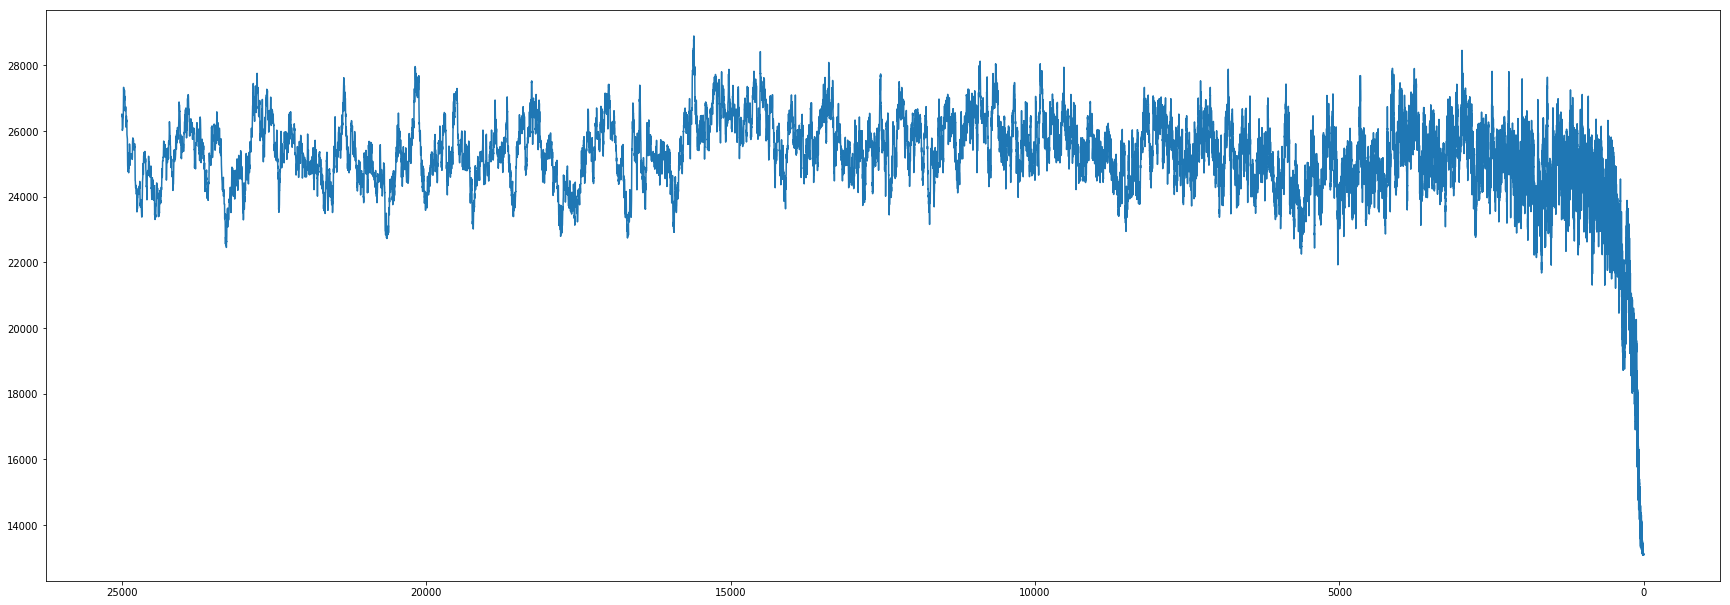

In [3]:
E, T = tsp.getData()
plt.plot(T, E)
ax = plt.gca()
ax.invert_xaxis()
plt.gcf().set_size_inches(30, 10.5)
plt.show()

## 4 chmury punktów

In [ ]:
c1 = create_points(0,0,20,20,20)
c2 = create_points(0,40,20,60,20)
c3 = create_points(40, 0, 60, 20, 20)
c4 = create_points(40,40,60,60,20)

tsp4 = TSP(list(itertools.chain(c1, c2, c3, c4)))
a, b = tsp4.anneal()
plot_tsp(a)



## Dla 9 chmur

In [ ]:
c1 = create_points(0,0,20,20,20)
c2 = create_points(0,40,20,60,20)
c3 = create_points(0, 80, 20, 100, 20)

c4 = create_points(40, 0, 60, 20, 20)
c5 = create_points(40,40,60,60,20)
c6 = create_points(40, 80, 60, 100, 20)

c7 = create_points(80, 0, 100, 20, 20)
c8 = create_points(80,40,100,60,20)
c9 = create_points(80, 80, 100, 100, 20)


tsp9 = TSP(list(itertools.chain(c1, c2, c3, c4, c5, c6, c7, c8, c9)))
a, b = tsp9.anneal()
plot_tsp(a)


## Zad 2

In [ ]:
class BIN_sa(Annealer):
    def move(self):
        n = self.state.shape[0] - 1
        a = 0.5>= random.random();
        if a:
            c1 = random.randint(0, n)
            c2 = random.randint(0, n)
            temp = np.copy(self.state[:, c1])
            self.state[:, c1] = self.state[:, c2]
            self.state[:, c2] = temp
        else:
            r1 = random.randint(0, n)
            r2 = random.randint(0, n)
            temp = np.copy(self.state[r1,:])
            self.state[r1,:] = self.state[r2,:]
            self.state[r2,:] = temp
            
        
    def neighbors(self, x, y): 
        neighborCoor = [[0, 1], [1,1], [1, 0], [0, -1], [-1, 0], [-1,-1], [1,-1], [-1,1]]
        neighs = [];
        for coor in neighborCoor:
            x1 = x + coor[0]
            y1 = y + coor[1]
            if x1>=0 and x1<self.state.shape[0] and y1 < self.state.shape[0] and y1>=0:
                neighs.append([x1, y1])
        return neighs
        
    def energy(self):
        e = 0
        for i in range(math.floor(self.state.shape[0])):
            for j in range(math.floor(self.state.shape[0])):
                neighs = self.neighbors(i,j)
                n = 0
                for neigh in neighs:
                    if np.all([self.state[neigh[0]][neigh[1]],[1,1,1]]):
                        e+=1
        return e
                    

        
def printBIN(BIN):
    plt.imshow(BIN, interpolation='nearest')
    plt.show()
    


def generateBIN(n, fi):
    white = [1,1,1]
    black = [0,0,0]
    BIN = np.empty((n,n,3))
    for i in range(n):
        for j in range(n):
            BIN[i][j] = black if random.random() < fi else white
    return BIN

def switch(arr):
        n = arr.shape[0] - 1
        a = 0.5>= random.random();
        if a:
            c1 = random.randint(0, n)
            c2 = random.randint(0, n)
            print(c1, ' c', c2)
            temp = np.copy(arr[:, c1])
            arr[:, c1] = arr[:, c2]
            arr[:, c2] = temp
        else:
            r1 = random.randint(0, n)
            r2 = random.randint(0, n)
            print(r1, ' r', r2)
            temp = np.copy(arr[r1,:])
            arr[r1,:] = arr[r2,:]
            arr[r2,:] = temp

In [ ]:
n = 64
fi = 0.3
BIN = generateBIN(n, fi)
printBIN(BIN)
binn = BIN_sa(BIN)
binn.steps = 10000
a, b = binn.anneal()
print(a)

In [ ]:
printBIN(a)

## Simulated annealing sudoku

In [ ]:
sud = np.genfromtxt('./game.csv', delimiter=',')
print(sud)
def get_row(array, i):
    return array[i,:]
def get_col(array, i):
    return array[:,i]
def get_3x3(array, i, j):
    return array[i*3:(i+1)*3,j*3:(j+1)*3]
def dups_in_array(arr):
    suma = 0
    for i in range(1, 10):
        dups = (arr==i).sum()
        if dups > 1:
            suma+=(dups-1)
    return suma
def get_empty_fields_coor(array):
    empty = []
    for i in range(array.shape[0]):
        for j in range(array.shape[0]):
            if math.isnan(array[i][j]):
                empty.append([i,j])
    return empty

class SUDOKU(Annealer):
    def __init__(self, state, empty):
        self.empty = empty
        super(SUDOKU, self).__init__(state)
        
    def move(self):
        index1 = self.empty[random.randint(0, len(list(self.empty)) - 1)]
        index2 = self.empty[random.randint(0, len(list(self.empty)) - 1)]
        while math.floor(index1[0]/3) != math.floor(index2[0]/3) or math.floor(index1[1]/3) != math.floor(index2[1]/3):
            index2 = self.empty[random.randint(0, len(list(self.empty)) - 1)]
        self.state[index1[0]][index1[1]], self.state[index2[0]][index2[1]] = self.state[index2[0]][index2[1]], self.state[index1[0]][index1[1]]
        
    def energy(self):
        e = 0
        for i in range(0, self.state.shape[0]):
            e+=dups_in_array(get_row(self.state, i))
            e+=dups_in_array(get_col(self.state, i))
        for i in range(0, 3):
            for j in range(0, 3):
                e+=dups_in_array(get_3x3(self.state,i,j))
        return e
        
emptyf = get_empty_fields_coor(sud)

for coor in emptyf:
    i = 1
    while (get_3x3(sud, math.floor(coor[0]/3), math.floor(coor[1]/3))==i).sum() > 0:
        i = i + 1;
    sud[coor[0]][coor[1]] = i
print(sud)

In [ ]:
sudoku = SUDOKU(sud, emptyf)
sudoku.Tmax = 0.5
sudoku.Tmin = 0.4
sudoku.steps = 100000
a, b = sudoku.anneal()

print(a)
print(b)

In [ ]:
print(sud)

In [ ]:
print(b)